# Decode cypher text

### Welcome!
This notebook can decode cypher text. It uses a DFA created by the method outlined here
[Extracting Automata from Recurrent Neural Networks Using Queries and Counterexamples](https://arxiv.org/abs/1711.09576).

In this notebook will automatically train an RNN on symplfied set of english, and extract a DFA from that RNN.


# Code below

In [1]:
from LSTM import LSTMNetwork
from GRU import GRUNetwork
from RNNClassifier import RNNClassifier
from Training_Functions import make_train_set_for_target,mixed_curriculum_train
from Extraction import extract
import time
from memory_profiler import profile
import FalseWordGenerator as FWG

import ALPHABET_8
ALPHABET = ALPHABET_8.ALPHABET
print (ALPHABET)

['a', 'e', 'i', 'n', 'o', 'r', 's', 't']


In [2]:
MEANINGFUL_WORDS = ALPHABET_8.WORDS
MEANINGLESS_WORDS = FWG.generateFalseWords(ALPHABET, MEANINGFUL_WORDS)
def target(w):             
   if w.lower() in MEANINGFUL_WORDS:
      return True
   else:
      return False
    
train_set = {}
train_set.update({w: True for w in MEANINGFUL_WORDS})
train_set.update({w: False for w in MEANINGLESS_WORDS})
print ("made training set of size: " + str(len(train_set)))
print ("of which " + str(len(MEANINGFUL_WORDS)) + str(" are positive"))
print ("of which " + str(len(MEANINGLESS_WORDS)) + str(" are negative"))

made training set of size: 2046
of which 1031 are positive
of which 1023 are negative


# Train and Extract with the optimal network

In [3]:
rnnOpt = RNNClassifier(ALPHABET,num_layers=3,hidden_dim=50,RNNClass = LSTMNetwork)

The dy.parameter(...) call is now DEPRECATED.
        There is no longer need to explicitly add parameters to the computation graph.
        Any used parameter will be added automatically.


('current average loss is: ', 0.3346154176721385)
('current average loss is: ', 0.18582995431680316)
('current average loss is: ', 0.04512480744160712)


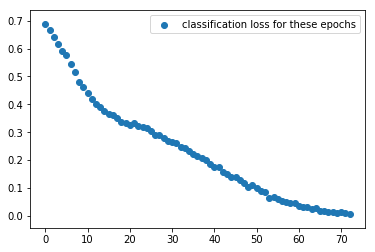

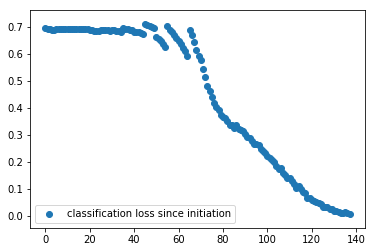

('classification loss on last batch was:', 0.006397436046066942)


In [4]:
mixed_curriculum_train(rnnOpt,train_set,stop_threshold = 0.01)

In [5]:
all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
pos = next((w for w in all_words if rnnOpt.classify_word(w)==True),None)
neg = next((w for w in all_words if rnnOpt.classify_word(w)==False),None)
starting_examples = [w for w in [pos,neg] if not None == w]

In [6]:
rnnOpt.renew()

In [7]:
dfaOpt = extract(rnnOpt,time_limit = 60, initial_split_depth = 10, starting_examples = starting_examples)

('provided counterexamples are:', ['te', 'tr'])
obs table refinement took 0.002
guided starting equivalence query for DFA of size 2
('key :', ('2', '1'))
('ev :', 'e,n,r-t')
('tf :', {(1, 'r-t'): 0, (1, 'e'): 0, (1, 'n'): 0})
('key :', ('1', '2'))
('ev :', 'a,e,i,n,o,r-t')
('tf :', {(0, 'a'): 1, (0, 'n'): 1, (0, 'o'): 1, (1, 'e'): 0, (1, 'n'): 0, (0, 'r-t'): 1, (1, 'r-t'): 0, (0, 'e'): 1, (0, 'i'): 1})
('key :', ('2', '2'))
('ev :', 'a,i,o')
('tf :', {(0, 'a'): 1, (0, 'n'): 1, (0, 'o'): 1, (1, 'o'): 1, (1, 'e'): 0, (1, 'n'): 0, (0, 'r-t'): 1, (1, 'i'): 1, (1, 'r-t'): 0, (0, 'e'): 1, (1, 'a'): 1, (0, 'i'): 1})
storing provided counterexample of length 2
returning counterexample of length 2:		tr, this counterexample is rejected by the given RNN.
equivalence checking took: 0.00194100000002
obs table refinement took 0.108
guided starting equivalence query for DFA of size 8
('key :', ('7', '6'))
('ev :', 'e,o')
('tf :', {(6, 'e'): 5, (6, 'o'): 5})
('key :', ('5', '5'))
('ev :', 'e,n,s,t')
(

split wasn't perfect: gotta start over
['a', 'i']
['n', 't']
refining, H size is 1
<Quantisations.SVMDecisionTreeNode instance at 0x1a3c4c15a8>
['ai', 'ao']
['', 'er']
refining, H size is 1
<Quantisations.SVMDecisionTreeNode instance at 0x1a3d238758>
['na', 'ni']
['en', 'nn']
['na', 'ni', 'no']
returning counterexample of length 2:		no, this counterexample is accepted by the given RNN.
equivalence checking took: 2.867893


/Users/apt305/anaconda2/envs/python3/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


obs table refinement took 0.298
guided starting equivalence query for DFA of size 16
('key :', ('3', '11'))
('ev :', 'e')
('tf :', {(2, 'e'): 10})
('key :', ('12', '13'))
('ev :', 't')
('tf :', {(2, 'e'): 10, (11, 't'): 12})
('key :', ('11', '11'))
('ev :', 'e,t')
('tf :', {(10, 'e'): 10, (10, 't'): 10, (2, 'e'): 10, (11, 't'): 12})
('key :', ('8', '3'))
('ev :', 'n,r')
('tf :', {(10, 'e'): 10, (7, 'r'): 2, (10, 't'): 10, (11, 't'): 12, (2, 'e'): 10, (7, 'n'): 2})
('key :', ('14', '3'))
('ev :', 'e,o')
('tf :', {(10, 'e'): 10, (13, 'o'): 2, (13, 'e'): 2, (7, 'r'): 2, (10, 't'): 10, (11, 't'): 12, (2, 'e'): 10, (7, 'n'): 2})
('key :', ('6', '7'))
('ev :', 'e,n')
('tf :', {(5, 'e'): 6, (10, 'e'): 10, (13, 'o'): 2, (13, 'e'): 2, (7, 'r'): 2, (10, 't'): 10, (5, 'n'): 6, (11, 't'): 12, (2, 'e'): 10, (7, 'n'): 2})
('key :', ('5', '5'))
('ev :', 'r')
('tf :', {(5, 'e'): 6, (10, 'e'): 10, (4, 'r'): 4, (13, 'o'): 2, (13, 'e'): 2, (7, 'r'): 2, (10, 't'): 10, (5, 'n'): 6, (11, 't'): 12, (2, 'e'):

obs table refinement took 1.345
guided starting equivalence query for DFA of size 43
['a', 'i']
refining, H size is 1
<Quantisations.SVMDecisionTreeNode instance at 0x1a3c447a70>
['ai', 'ao']
['aa', 'ia']
returning counterexample of length 4:		iare, this counterexample is accepted by the given RNN.
equivalence checking took: 0.049344
obs table refinement took 8.392
guided starting equivalence query for DFA of size 148
['ai', 'ao']
['aa', 'ia']
refining, H size is 1
<Quantisations.SVMDecisionTreeNode instance at 0x1a3d25b758>
['ia', 'ii']
returning counterexample of length 4:		iian, this counterexample is rejected by the given RNN.
equivalence checking took: 0.0826
obs table refinement took 14.223
guided starting equivalence query for DFA of size 242
['ai', 'ao']
['ia', 'ii']
refining, H size is 1
<Quantisations.SVMDecisionTreeNode instance at 0x1a3dfec050>
['an', 'in']
refining, H size is 1
<Quantisations.SVMDecisionTreeNode instance at 0x1a3c4472d8>
['ee', 'io']
refining, H size is 1


# Cypher some messages

In [8]:
import cypher_creation as c
#a,e,i,n,o,r,s,t
messageOne = 'tea is rotten'
messageTwo = 'no rest eat'
messageThree = 'stone it not'

cypher1 = c.rotate_sentence(messageOne, ALPHABET)
cypher2 = c.rotate_sentence(messageTwo, ALPHABET)
cypher3 = c.rotate_sentence(messageThree, ALPHABET)

print(cypher1)
print(cypher2)
print(cypher3)

tea is rotten
no rest eat
stone it not
aie nt sraaio 
or sita iea 
taroi na ora 


In [9]:
import Rotation_Checker as RCT
RCT.rtCyChecker(cypher1, ALPHABET, rnnOpt, dfaOpt)        # Call above functions
RCT.rtCyChecker(cypher2, ALPHABET, rnnOpt, dfaOpt)
RCT.rtCyChecker(cypher3, ALPHABET, rnnOpt, dfaOpt)

Try message in following list 
 [['eni', 'oa', 'tseenr'], ['ion', 're', 'atiios'], ['nro', 'si', 'eannrt'], ['osr', 'tn', 'ieoosa'], ['rts', 'ao', 'nirrte'], ['sat', 'er', 'onssai'], ['tea', 'is', 'rotten']]
Cyphered Message is English  ion re atiios in RNN
Cyphered Message is English  tea is rotten in RNN
RNN execution time 0.003988981246948242
Cyphered Message is English  tea is rotten in DFA
DFA execution time 0.0
Try message in following list 
 [['rs', 'tnae', 'nie'], ['st', 'aoei', 'oni'], ['ta', 'erin', 'ron'], ['ae', 'isno', 'sro'], ['ei', 'ntor', 'tsr'], ['in', 'oars', 'ats'], ['no', 'rest', 'eat']]
Cyphered Message is English  no rest eat in RNN
RNN execution time 0.003988981246948242
3 out of  3 words is English
Cyphered Message is English  ae isno sro in DFA
DFA execution time 0.0
Try message in following list 
 [['aesrn', 'oe', 'rse'], ['eitso', 'ri', 'sti'], ['inatr', 'sn', 'tan'], ['noeas', 'to', 'aeo'], ['oriet', 'ar', 'eir'], ['rsnia', 'es', 'ins'], ['stone', 'it', 'not

(True, True)

In [10]:
import accuracyChecker as AC
AC.accuracyChecker(MEANINGFUL_WORDS, ALPHABET, rnnOpt, dfaOpt)


serer retention tie erin steatornis 
Try message in following list 
 [['antnt', 'tnenreosr', 'eon', 'ntor', 'aeniestroa'], ['eoaoa', 'aoiosirts', 'iro', 'oars', 'eionitasre'], ['irere', 'ernrtnsat', 'nsr', 'rest', 'inronaetsi'], ['nsisi', 'isosaotea', 'ots', 'sita', 'nosroeiatn'], ['otntn', 'ntrteraie', 'rat', 'tnae', 'ortsrineao'], ['raoao', 'oasaiseni', 'sea', 'aoei', 'rsatsnoier'], ['serer', 'retention', 'tie', 'erin', 'steatornis']]
Cyphered Message is English  serer retention tie erin steatornis in RNN
RNN execution time 0.013962268829345703
5 out of  5 words is English
Cyphered Message is English  serer retention tie erin steatornis in DFA
DFA execution time 0.000997304916381836
WOW
area neritina rennin asterion arete 
Try message in following list 
 [['itni', 'rntoeori', 'tnrror', 'iaentosr', 'itnen'], ['naon', 'soarirsn', 'aossrs', 'neioarts', 'naoio'], ['oero', 'tresnsto', 'erttst', 'oinresat', 'oernr'], ['risr', 'asitotar', 'isaata', 'rnositea', 'risos'], ['snts', 'etnaraes',

Cyphered Message is English  tenoroon anne satori rooter taoist in RNN
RNN execution time 0.012965202331542969
Cyphered Message is English  tenoroon anne satori rooter taoist in DFA
DFA execution time 0.0
nonresonant enteron one aeon renoir 
Try message in following list 
 [['rsrtnasrire', 'nrentsr', 'srn', 'insr', 'tnrsot'], ['stsaoetsnsi', 'osioats', 'tso', 'nots', 'aostra'], ['tateriatotn', 'rtnreat', 'atr', 'orat', 'ertase'], ['aeaisnearao', 'saosiea', 'eas', 'rsea', 'isaeti'], ['eientoieser', 'tertnie', 'iet', 'stie', 'nteian'], ['inioarnitis', 'aisaoni', 'nia', 'tani', 'oaineo'], ['nonresonant', 'enteron', 'one', 'aeon', 'renoir']]
Cyphered Message is English  nonresonant enteron one aeon renoir in RNN
RNN execution time 0.01010274887084961
5 out of  5 words is English
Cyphered Message is English  nonresonant enteron one aeon renoir in DFA
DFA execution time 0.0
ionia ernst tiro assonant ranter 
Try message in following list 
 [['osroi', 'ntrae', 'eots', 'iaasrire', 'tirent'], ['

Cyphered Message is English  arietta inset treasonist inn roarer in RNN
RNN execution time 0.012965917587280273
5 out of  5 words is English
Cyphered Message is English  arietta inset treasonist inn roarer in DFA
DFA execution time 0.0
raise tinter nester arsenate ass 
Try message in following list 
 [['tioan', 'eorent', 'rnaent', 'itanrien', 'iaa'], ['anreo', 'irsioa', 'soeioa', 'naeosnio', 'nee'], ['eosir', 'nstnre', 'trinre', 'oeirtonr', 'oii'], ['irtns', 'otaosi', 'asnosi', 'rinsaros', 'rnn'], ['nsaot', 'raertn', 'etortn', 'snotesrt', 'soo'], ['otera', 'seisao', 'iarsao', 'toraitsa', 'trr'], ['raise', 'tinter', 'nester', 'arsenate', 'ass']]
Cyphered Message is English  raise tinter nester arsenate ass in RNN
RNN execution time 0.011968135833740234
Cyphered Message is English  raise tinter nester arsenate ass in DFA
DFA execution time 0.0
terror taste teens eerie norse 
Try message in following list 
 [['enttst', 'eiaen', 'ennra', 'nnton', 'rstan'], ['ioaata', 'ineio', 'ioose', 'ooa

Cyphered Message is English  test stress terrorise soar satirise in DFA
DFA execution time 0.022043228149414062
WOW
era retrorse soon tanner inanition 
Try message in following list 
 [['nti', 'tnetstan', 'assr', 'eirrnt', 'oriroeosr'], ['oan', 'aoiataeo', 'etts', 'inssoa', 'rsnsrirts'], ['reo', 'erneaeir', 'iaat', 'nottre', 'stotsnsat'], ['sir', 'isoieins', 'neea', 'oraasi', 'taratotea'], ['tns', 'ntrninot', 'oiie', 'rseetn', 'aesearaie'], ['aot', 'oasonora', 'rnni', 'stiiao', 'eitieseni'], ['era', 'retrorse', 'soon', 'tanner', 'inanition']]
Cyphered Message is English  era retrorse soon tanner inanition in RNN
RNN execution time 0.017951488494873047
Cyphered Message is English  era retrorse soon tanner inanition in DFA
DFA execution time 0.0
tinter arrester sennett serene rossetti 
Try message in following list 
 [['eorent', 'ittnaent', 'anrrnee', 'antnrn', 'tsaaneeo'], ['irsioa', 'naaoeioa', 'eossoii', 'eoaoso', 'ateeoiir'], ['nstnre', 'oeerinre', 'irttrnn', 'irertr', 'eaiirnns'], [

#### 3.4. Get stats
Display the extracted DFA by using the `draw_nicely` function, which has optional parameters `maximum` (default $60$) and `force` (default `False`), and will only draw the DFA if it has less than `maximum` states or `force` is set to `True`.

Print some statistics you might find interesting about the network, such as the trained RNN's accuracy against its target, the extracted DFA's accuracy against the RNN, and the extracted DFA's accuracy against the original RNN's target.

In [8]:
from math import pow
def percent(num,digits=2):
    tens = pow(10,digits)
    return str(int(100*num*tens)/tens)+"%"
print("hello")
dfaOpt.draw_nicely(maximum=300) #max size willing to draw
print("hi")

word = list("ASOI")
actualWord = dfaOpt.wordsWithWordnessScore(word)
print("originialWord :", actualWord)

hello
('key :', ('242', '14'))
('ev :', 'n,r')
('tf :', {(241, 'r'): 13, (241, 'n'): 13})
('key :', ('32', '40'))
('ev :', 's,t')
('tf :', {(31, 't'): 39, (241, 'r'): 13, (31, 's'): 39, (241, 'n'): 13})
('key :', ('99', '232'))
('ev :', 't')
('tf :', {(31, 't'): 39, (241, 'r'): 13, (98, 't'): 231, (31, 's'): 39, (241, 'n'): 13})
('key :', ('208', '158'))
('ev :', 'a,e,i,o')
('tf :', {(241, 'r'): 13, (31, 's'): 39, (98, 't'): 231, (207, 'a'): 157, (207, 'i'): 157, (207, 'e'): 157, (207, 'o'): 157, (31, 't'): 39, (241, 'n'): 13})
('key :', ('214', '191'))
('ev :', 't')
('tf :', {(241, 'r'): 13, (213, 't'): 190, (31, 's'): 39, (98, 't'): 231, (207, 'a'): 157, (207, 'i'): 157, (207, 'e'): 157, (207, 'o'): 157, (31, 't'): 39, (241, 'n'): 13})
('key :', ('79', '14'))
('ev :', 'n,r,s')
('tf :', {(241, 'r'): 13, (213, 't'): 190, (31, 's'): 39, (78, 'r'): 13, (98, 't'): 231, (78, 's'): 13, (207, 'a'): 157, (207, 'i'): 157, (207, 'e'): 157, (78, 'n'): 13, (207, 'o'): 157, (31, 't'): 39, (241, 'n

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
word = list("asoi")
actualWord = dfaOpt.wordsWithWordnessScore(word)
print("originialWord :", actualWord)


('updated word :', ['a', 's', 'o', 'i'])
a
a
a
e
('current state :', 0)
left (0, 'e')
('current state :', 230)
left (230, 's')
('current state :', 213)
left (213, 'o')
('current state :', 157)
left (157, 'i')
a
i
('current state :', 0)
left (0, 'i')
('current state :', 232)
left (232, 's')
('current state :', 39)
left (39, 'o')
('current state :', 165)
left (165, 'i')
a
n
('current state :', 0)
left (0, 'n')
('current state :', 163)
left (163, 's')
a
o
('current state :', 0)
left (0, 'o')
('current state :', 116)
left (116, 's')
('current state :', 118)
left (118, 'o')
('current state :', 13)
left (13, 'i')
a
r
('current state :', 0)
left (0, 'r')
('current state :', 166)
left (166, 's')
a
s
('current state :', 0)
left (0, 's')
('current state :', 163)
left (163, 's')
a
t
('current state :', 0)
left (0, 't')
('current state :', 65)
left (65, 's')
('current state :', 13)
left (13, 'o')
('current state :', 13)
left (13, 'i')
('wordnessScore :', {'nsoi': 1, 'osoi': 4, 'isoi': 4, 'tsoi': 4

In [14]:
dfaOpt.classify_word("eene")

True

In [11]:

from math import pow
def percent(num,digits=2):
    tens = pow(10,digits)
    return str(int(100*num*tens)/tens)+"%"

dfaOpt.draw_nicely(maximum=300) #max size willing to draw

test_set = train_set 
print("testing on train set, i.e. test set is train set")
# we're printing stats on the train set for now, but you can define other test sets by using
# make_train_set_for_target

n = len(test_set)
print("test set size:", n)
pos = len([w for w in test_set if target(w)])
print("of which positive:",pos,"("+percent(pos/n)+")")
rnn_target = len([w for w in test_set if rnn.classify_word(w)==target(w)])
print("rnn score against target on test set:",rnn_target,"("+percent(rnn_target/n)+")")
dfa_rnn = len([w for w in test_set if rnn.classify_word(w)==dfa.classify_word(w)])
print("extracted dfa score against rnn on test set:",dfa_rnn,"("+percent(dfa_rnn/n)+")")
dfa_target = len([w for w in test_set if dfa.classify_word(w)==target(w)])
print("extracted dfa score against target on rnn's test set:",dfa_target,"("+percent(dfa_target/n)+")")


testing on train set, i.e. test set is train set
test set size: 2042
of which positive: 1031 (50.48%)


NameError: name 'rnn' is not defined

Rotation Cypher Checker